In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 

In [11]:
train = pd.read_csv('./mitrphol-ai-hackathon/data_collection.csv')
train

,ID,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_32,column_33,column_34,column_35,column_36,column_37,column_38,column_39,column_40,sugar_price
0,1,35.940913,73.664852,36.032001,37.547395,0.012069,0.204383,"1,650.6000",37.692459,39.690071,...,35.209930,37.185527,27.295344,40.151343,36.863736,37.723302,-45.676536,29.597220,28.914456,26.083441
1,2,35.444034,72.893853,35.533862,37.028305,0.012069,0.204383,"1,616.3000",37.171364,39.141360,...,34.723156,36.671441,26.917988,39.596255,36.354098,37.201781,-45.001291,29.387656,28.743080,25.058946
2,3,37.058890,75.399594,37.152812,38.715343,0.012069,0.204383,"1,615.5000",38.864920,40.924669,...,36.305169,38.342219,28.144392,41.400290,38.010418,38.896722,-47.195833,30.068740,29.300050,26.082431
3,4,36.354978,74.307348,36.447116,37.979967,0.012069,0.204383,"1,620.4000",38.126703,40.147329,...,35.615573,37.613931,27.609805,40.613915,37.288432,38.157901,-46.239237,29.771857,29.057268,26.076653
4,5,34.298452,71.116277,34.385377,35.831518,0.012069,0.204383,"1,656.0000",35.969954,37.876277,...,33.600873,35.486188,26.047975,38.316469,35.179102,35.999387,-43.444479,28.904494,28.347965,24.041001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2648,27.038497,59.851153,27.107023,28.247060,0.012069,0.204383,"1,918.4000",28.356193,29.859004,...,26.488576,27.974825,20.534400,30.206021,27.732741,28.379396,-33.578419,25.842528,25.843981,19.014557
2648,2649,27.383552,60.386568,27.452953,28.607538,0.012069,0.204383,"1,933.8000",28.718063,30.240053,...,26.826613,28.331829,20.796452,30.591499,28.086655,28.741563,-34.047338,25.988059,25.962991,19.081052
2649,2650,28.170277,61.607312,28.241671,29.429428,0.012069,0.204383,"1,941.6000",29.543128,31.108845,...,27.597336,29.145798,21.393930,31.470387,28.893580,29.567303,-35.116473,26.319868,26.234335,20.064202
2650,2651,28.032254,61.393146,28.103299,29.285236,0.012069,0.204383,"1,944.3000",29.398379,30.956425,...,27.462121,29.002996,21.289109,31.316196,28.752013,29.422435,-34.928905,26.261656,26.186731,20.084427


In [12]:
test = pd.read_csv('./mitrphol-ai-hackathon/sandbox_submission.csv')
test

,ID,Prediction
0,1,20.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
360,361,0.0
361,362,0.0
362,363,0.0
363,364,0.0


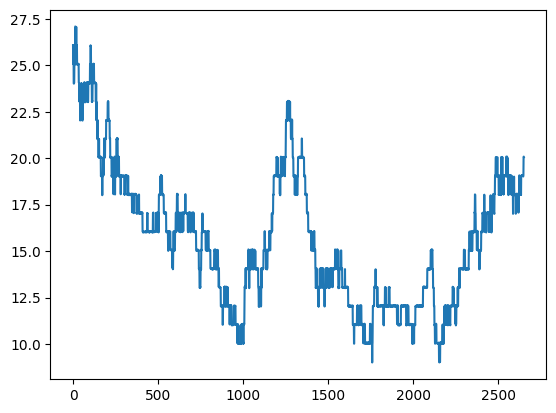

In [13]:
train['sugar_price'].plot()
plt.show()

In [14]:
# Fit ARIMA model
model = ARIMA(train['sugar_price'], order=(3,3,5)) 
model_fit = model.fit()

/Users/thiraputkongnok/anaconda3/envs/env_imageProcessing/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/thiraputkongnok/anaconda3/envs/env_imageProcessing/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
forecast = model_fit.forecast(steps=365, alpha=0.05)

/Users/thiraputkongnok/anaconda3/envs/env_imageProcessing/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [16]:
len(forecast)

365

In [17]:
forecast = pd.Series(forecast)

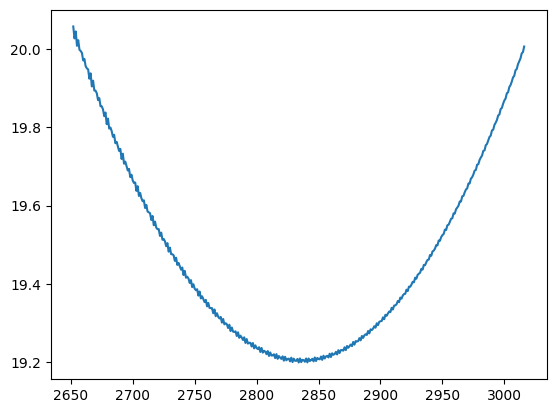

In [18]:
forecast.plot()
plt.show()